## Some estimation terminology

### Paul Anzel, 12/16/15

(With copious copying of my Caltech Ph129c notes...)

When we try and estimate some value about our data, here's some things we want to have. However, there's often a trade-off between them.

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Bias

An estimator is *biased* if our expected value of it is different from the true value.

$$b(\hat \theta) = \langle \hat \theta \rangle - \theta$$

For example, why do we divide by $n - 1$ for standard deviation instead of $n$?

For $\hat s = \frac{1}{n}\sum_{i = 1}^n (x_i - m)^2$ where $m$ is the sample mean, the bias is:

$$
\begin{align}
b(s) &= \langle \hat s \rangle - s \\
&= \langle \frac{1}{n}\sum_{i = 1}^n (x_i - m)^2\rangle - s \\
&= \frac{1}{n}\langle \sum_{i = 1}^n (x_i - m)^2\rangle - s \\
&= \langle (x_1 - m)^2\rangle - s, \text{because IID} \\
&= \langle (x_1 - \theta + \theta - m)^2\rangle - s, \theta \text{ is the true mean of the distribution} \\
&= \langle (x_1 - \theta)^2 \rangle + \langle (\theta - m)^2 \rangle + 2 \langle (x_1 - \theta)(\theta - m) \rangle - s \\
&= s + \langle \left[ \frac{1}{n} \sum_{i=1}^n (\theta - x_i) \right]^2 \rangle + 2 \langle (x_1 - \theta)(\theta - \frac{x_1}{n} - \frac{1}{n}\sum_{i=2}^n x_i) \rangle - s \\
&= \frac{1}{n^2} \sum_{i=1}^n \langle (\theta - x_i)^2 \rangle + \frac{2}{n^2}\sum_{i < j} \langle (\theta - x_i)(\theta - x_j)\rangle + \frac{2}{n} \langle (x_1 - \theta)(\theta - x_1)\rangle + 2 \langle (x_1 - \theta) (\frac{1}{n}\sum_{i=2}^n x_i ) \rangle\\
&= \frac{s}{n} - \frac{2s}{n} + 2 \langle (x_1 - \theta) \rangle \langle (\frac{1}{n}\sum_{i=2}^n x_i ) \rangle, \text{since independent}\\
&= \frac{s}{n} - \frac{2s}{n} \\
b(s) &= - \frac{s}{n}
\end{align}$$

### Consistency

An estimator is *consistent* if your estimator approaches the real value as you collect more and more data.

$$\lim_{n \rightarrow \infty} \hat \theta (x_1, x_2, \dots, x_n) = \theta $$

Note that our biased estimator of standard deviation above __IS__ consistent, as the relative difference between $n$ and $n - 1$ vanishes as $n$ goes to infinity.

In [2]:
# Drawing samples from a Gaussian of mean 0, stdev 1
max_sample = 100
np.random.seed(100)
gaussian_sample = sp.stats.norm.rvs(size=max_sample)

bias_var = []
unbias_var = []
for N in range(5,max_sample+1):
    test_sample = gaussian_sample[:N]
    test_mean = test_sample.mean()
    bvar = (1/N)*np.sum((test_sample-test_mean)**2)
    ubvar = (1/(N-1))*np.sum((test_sample-test_mean)**2)
    bias_var.append(bvar)
    unbias_var.append(ubvar)
bias_var = np.array(bias_var)
unbias_var = np.array(unbias_var)
bias_std = np.sqrt(bias_var)
unbias_std = np.sqrt(unbias_var)

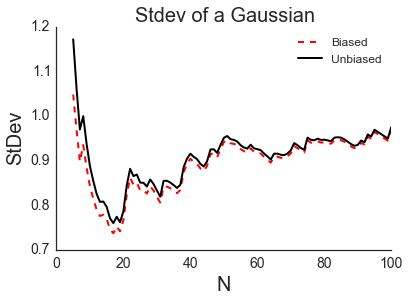

In [3]:
plt.plot(np.arange(5,max_sample+1), bias_std,
         color='r', linestyle='--', linewidth=2, label='Biased')
plt.plot(np.arange(5,max_sample+1), unbias_std,
         color='k', linewidth=2, label='Unbiased')
plt.xlabel('N', fontsize=20)
plt.ylabel('StDev', fontsize=20)
plt.legend(fontsize=12)
plt.tick_params(labelsize=14)
plt.title('Stdev of a Gaussian', fontsize=20)
sns.despine()

### Sufficiency

A set of estimators is *sufficient* if it's everything needed to describe the data set. For example, you can describe a Poisson distribution with just one parameter $\lambda$. Meanwhile, a normal distribution takes two parameters $\mu$ and $\sigma$.

### Robustness

An estimator is *robust* if it's not sensitive to big fluctuations. A simple example here is taking the median instead of the mean of a sample--the mean can be thrown off by an outlier, but the median won't be.

In [4]:
cauchy_sample_size=1000
num_runs = 100
np.random.seed(200)

cauchy_mean = np.zeros(num_runs)
cauchy_median = np.zeros(num_runs)

for ind in range(num_runs):
    cauchy_sample = sp.stats.cauchy.rvs(size=cauchy_sample_size)
    cauchy_mean[ind] = cauchy_sample.mean()
    cauchy_median[ind] = np.median(cauchy_sample)

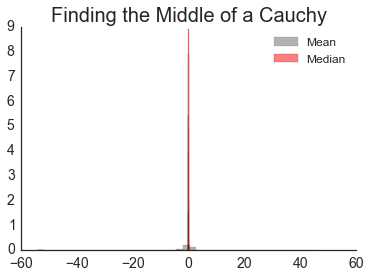

In [5]:
plt.hist(cauchy_mean, normed=True, bins=40, color='k', alpha=0.3, label='Mean')
plt.hist(cauchy_median, normed=True, bins=10, color='r', alpha=0.5, label='Median')
plt.legend(fontsize=12)
plt.tick_params(labelsize=14)
plt.title('Finding the Middle of a Cauchy', fontsize=20)
sns.despine()

### Efficency

The *efficency* of an estimator is its variance, $\text{Var}(\hat \theta)$. You'll often want to choose a more efficient estimtor instead of a less-efficient one, but you may get a trade-off. As a silly example, define $\hat \theta = 42$. No variance whatsoever!

### Rao-Cramer-Frechet inequality

How efficient can we have an estimator be? The Rao-Cramer-Frechet (RCF) inequality says that if:
1. The range of data $x$ is independent of $\theta$.
2. The variance of $\hat \theta$ is finite, for any $\theta$.
3. $\partial_{\theta} \int_{-\infty}^{\infty} f(x) L(\theta|x)dx = \int_{-\infty}^{\infty} f(x) \partial_{\theta} L(\theta|x)dx$ where $f(x)$ is any statistic of finite variance. ($L$ is the likelihood function we've talked about earlier.)

Then

$$ \sigma^2_{\hat \theta} \geq \frac{[1 + \partial_{\theta}b(\theta)]^2}{I(\theta)}$$

where $I(\theta)$ is the *Fisher Information Number*.

$$I(\theta) := \left\langle \left( \frac{\partial \ln L}{\partial \theta} \right)^2 \right\rangle = - \left\langle \frac{\partial^2 \ln L}{\partial \theta^2} \right\rangle$$

A statistic that reaches the equality above is called *efficient*. This leads to a theorem:

An efficient (perhaps biased) estimator for $\theta$ exists if-and-only-if

$$\frac{\partial \ln L(\theta|x)}{\partial \theta} = [f(x) - h(\theta)]g(\theta)$$

In other words, we're drawing from the exponential family.

Further, an unbiased efficient estimator exists if-and-only-if $h(\theta) = \theta$